### 2. Thresholding, Binarization & Adaptive Thresholding

Thresholding is a technique in OpenCV, which is the assignment of pixel values in relation to the threshold value provided. In thresholding, each pixel value is compared with the threshold value. If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value (generally 255)


Syntax: cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique) 
Parameters: 
-> source: Input Image array (must be in Grayscale). 
-> thresholdValue: Value of Threshold below and above which pixel values will change accordingly. 
-> maxVal: Maximum value that can be assigned to a pixel. 
-> thresholdingTechnique: The type of thresholding to be applied. 

===============================================================================================================================
 In Simple Thresholding, a global value of threshold was used which remained constant throughout. So, a constant threshold value won’t help in the case of variable lighting conditions in different areas. Adaptive thresholding is the method where the threshold value is calculated for smaller regions. This leads to different threshold values for different regions with respect to the change in lighting. We use cv2.adaptiveThreshold for this.
 Syntax: cv2.adaptiveThreshold(source, maxVal, adaptiveMethod, thresholdType, blocksize, constant)

Parameters:
-> source: Input Image array(Single-channel, 8-bit or floating-point)
-> maxVal: Maximum value that can be assigned to a pixel.
-> adaptiveMethod: Adaptive method decides how threshold value is calculated.

 cv2.ADAPTIVE_THRESH_MEAN_C: Threshold Value = (Mean of the neighbourhood area values – constant value). In other words, it is the mean of the blockSize×blockSize neighborhood of a point minus constant.
 cv2.ADAPTIVE_THRESH_GAUSSIAN_C: Threshold Value = (Gaussian-weighted sum of the neighbourhood values – constant value). In other words, it is a weighted sum of the blockSize×blockSize neighborhood of a point minus constant.

-> thresholdType: The type of thresholding to be applied.
-> blockSize: Size of a pixel neighborhood that is used to calculate a threshold value.
-> constant: A constant value that is subtracted from the mean or weighted sum of the neighbourhood pixels.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

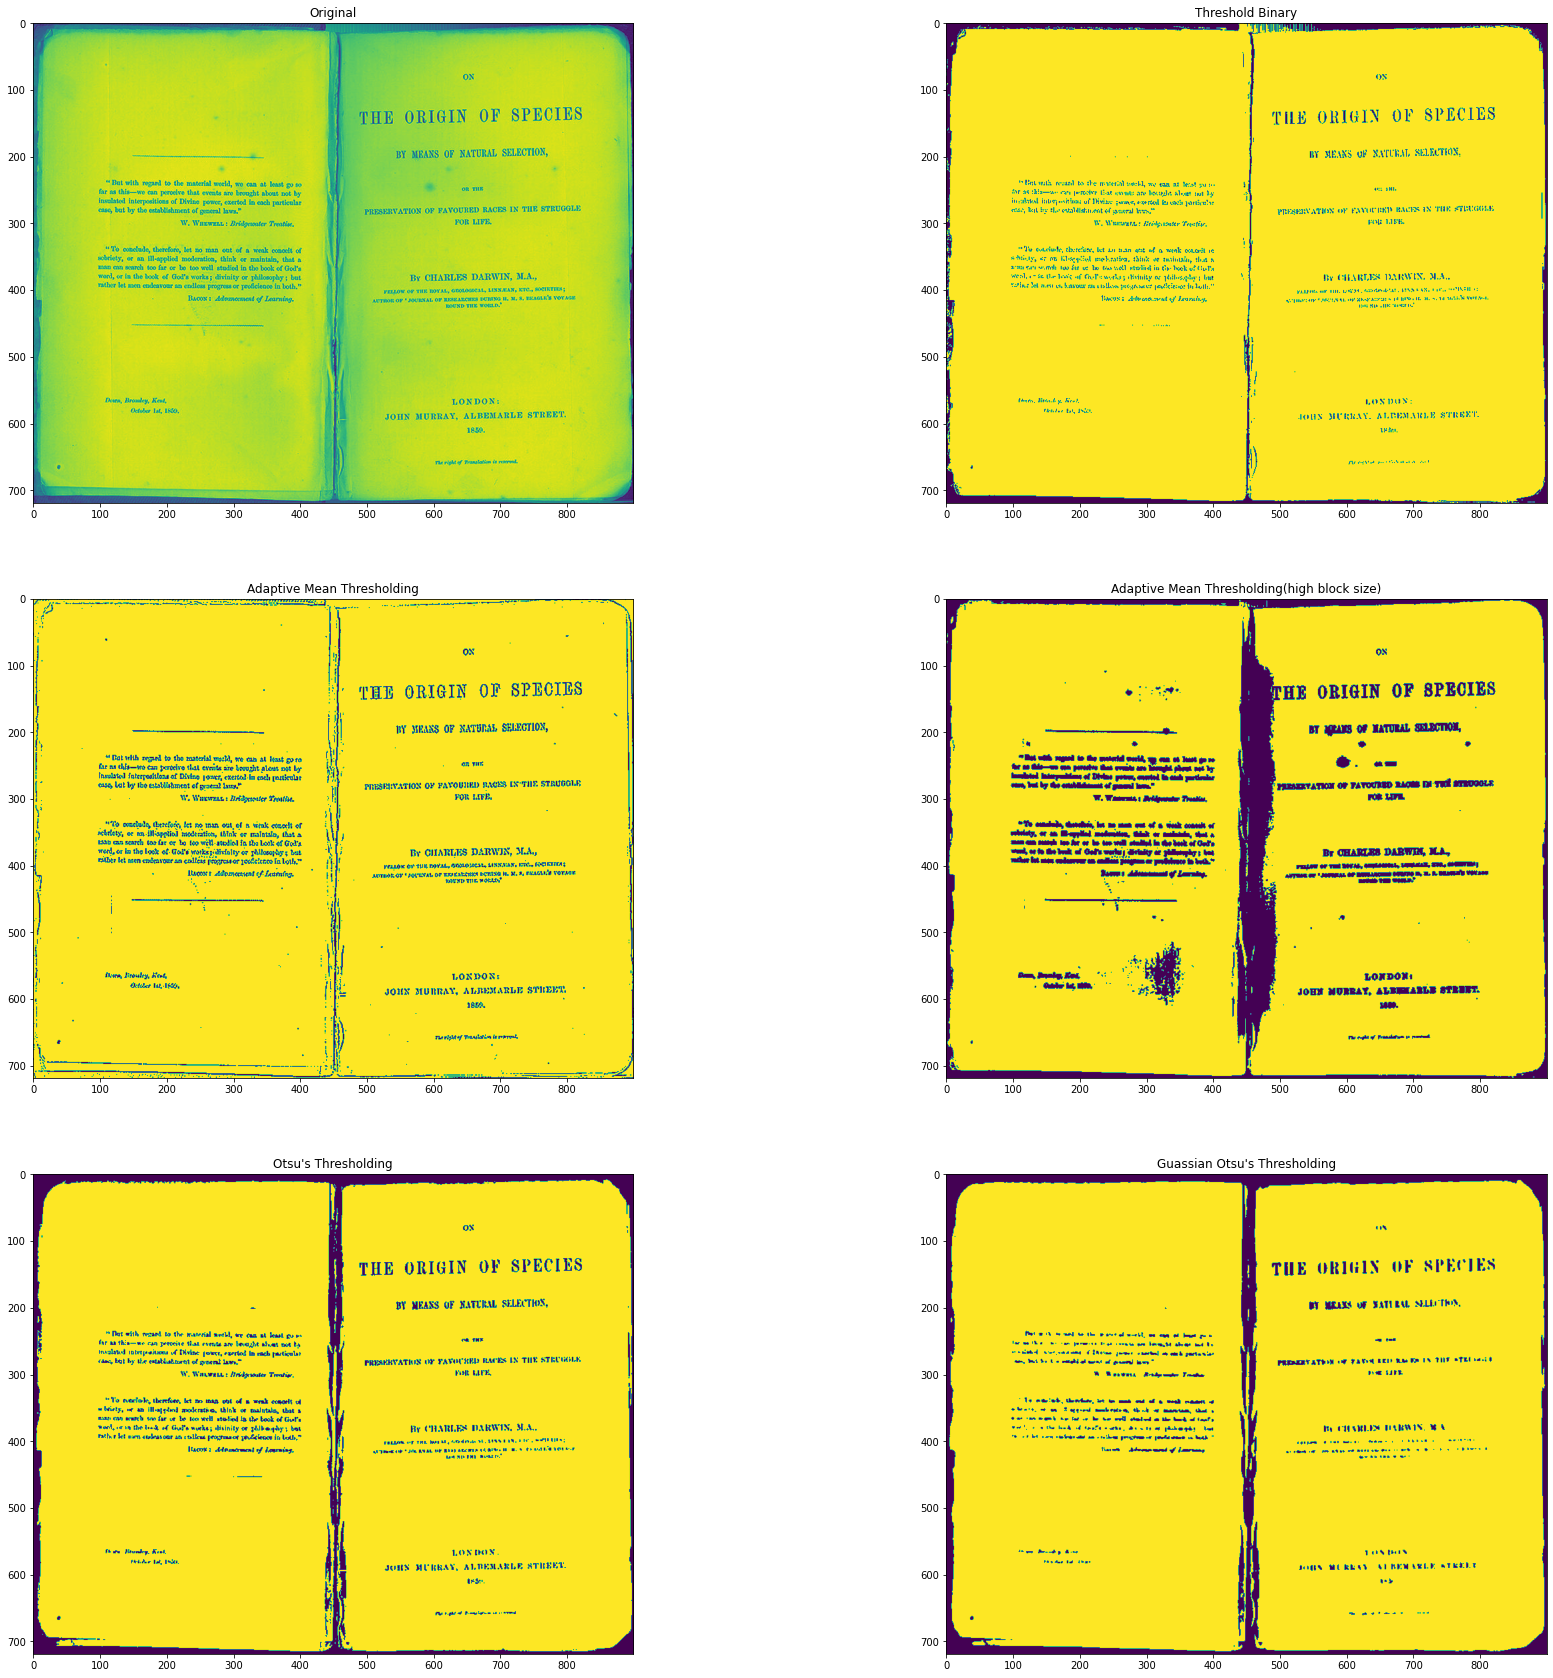

In [8]:
# Load our new image
image = cv2.imread('data/Origin_of_Species.jpg', 0)

plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)

# Values below 127 goes to 0 (black), everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.subplot(3, 2, 2)
plt.title("Threshold Binary")
plt.imshow(thresh1)


# It's good practice to blur images as it removes noise
image = cv2.GaussianBlur(image, (3, 3), 0)

# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 

plt.subplot(3, 2, 3)
plt.title("Adaptive Mean Thresholding")
plt.imshow(thresh)


# Using adaptiveThreshold with higher block size
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 5) 

plt.subplot(3, 2, 4)
plt.title("Adaptive Mean Thresholding(high block size)")
plt.imshow(thresh)

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(3, 2, 5)
plt.title("Otsu's Thresholding")
plt.imshow(th2)


plt.subplot(3, 2, 6)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.title("Guassian Otsu's Thresholding")
plt.imshow(th3)
plt.show()